In [205]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [207]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [208]:
#Carga de dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/machine learning/Datasets/datos2.csv')

In [209]:
#imprimimos el dataset
print(data)

   Tipo de Propiedad     Sector Total construido      Precio  \
0       Departamento       Same           160 m�  USD160.000   
1               Casa  El Bosque           960 m�  USD800.000   
2               Casa    Cumbay�           275 m�  USD360.000   
3            Terreno      Checa              NaN  USD275.000   
4               Casa    Cumbay�          1740 m�  USD850.000   
..               ...        ...              ...         ...   
93           Terreno     Puembo              NaN  USD270.600   
94           Terreno  Carapungo              NaN  USD774.000   
95              Casa    Tumbaco           200 m�  USD360.000   
96      Departamento  Miravalle           151 m�  USD190.000   
97              Casa    Tumbaco           322 m�  USD340.000   

                          Referencia  Dormitorios  Ba�os Superficie  Ambientes  
0              El Muelle, Esmeraldas          3.0    2.0        NaN        4.0  
1   Sector Uni�n Nacional, El Bosque          5.0    5.0    1443 m�  

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tipo de Propiedad  98 non-null     object 
 1   Sector             98 non-null     object 
 2   Total construido   59 non-null     object 
 3   Precio             98 non-null     object 
 4   Referencia         98 non-null     object 
 5   Dormitorios        53 non-null     float64
 6   Ba�os              55 non-null     float64
 7   Superficie         76 non-null     object 
 8   Ambientes          50 non-null     float64
dtypes: float64(3), object(6)
memory usage: 7.0+ KB


In [211]:
#ELIMINAMOS COLUMNAS QUE DIFICULTEN EL CÁLCULO

In [212]:
columnas_eliminar = ['Precio']
simbolo = 'USD'

for columna in columnas_eliminar:
    data[columna] = data[columna].str.replace(simbolo, '', regex=False)

In [213]:
columnas_eliminar = ['Superficie']
simbolo = '�'

for columna in columnas_eliminar:
    data[columna] = data[columna].str.replace(simbolo, '', regex=False)

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tipo de Propiedad  98 non-null     object 
 1   Sector             98 non-null     object 
 2   Total construido   59 non-null     object 
 3   Precio             98 non-null     object 
 4   Referencia         98 non-null     object 
 5   Dormitorios        53 non-null     float64
 6   Ba�os              55 non-null     float64
 7   Superficie         76 non-null     object 
 8   Ambientes          50 non-null     float64
dtypes: float64(3), object(6)
memory usage: 7.0+ KB


In [215]:
#llenar datos vacios
columnas_especificas = ['Dormitorios', 'Ba�os', 'Superficie','Ambientes','Total construido']
media_columnas = data[columnas_especificas].mean()
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)

<ipython-input-215-a3311b1907f5>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media_columnas = data[columnas_especificas].mean()


In [216]:
#captando variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [217]:
#Procesamiento de las categoricas
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tipo de Propiedad  98 non-null     int64  
 1   Sector             98 non-null     int64  
 2   Total construido   98 non-null     int64  
 3   Precio             98 non-null     int64  
 4   Referencia         98 non-null     int64  
 5   Dormitorios        98 non-null     float64
 6   Ba�os              98 non-null     float64
 7   Superficie         98 non-null     int64  
 8   Ambientes          98 non-null     float64
dtypes: float64(3), int64(6)
memory usage: 7.0 KB


In [219]:
# Lectura de Datos
X = data.iloc[:, :8]
y = data.iloc[:, 8]
m = y.size

In [220]:
print(X)
print(y)
print(m)

    Tipo de Propiedad  Sector  Total construido  Precio  Referencia  \
0                   1      18                13      14          15   
1                   0       7                57      71          48   
2                   0       6                31      46          12   
3                   5       5                58      34           5   
4                   0       6                16      74          50   
..                ...     ...               ...     ...         ...   
93                  5      17                58      33          33   
94                  5       2                58      68          19   
95                  0      20                21      46          53   
96                  1      12                10      16          24   
97                  0      20                38      44          45   

    Dormitorios     Ba�os  Superficie  
0      3.000000  2.000000          72  
1      5.000000  5.000000          23  
2      3.000000  3.000000  

In [221]:
#GRAFICAMOS DATOS

In [222]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Precio')
    pyplot.xlabel('Superficie')

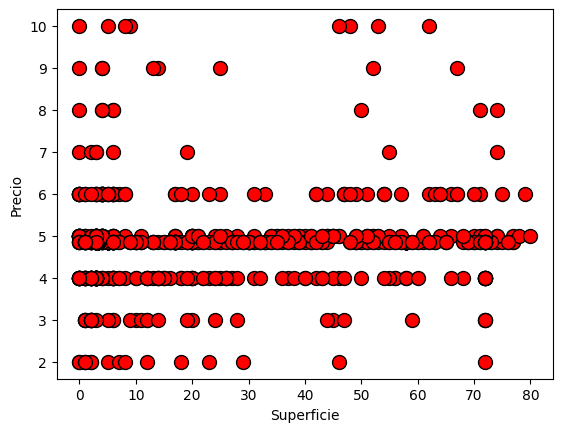

In [223]:
plotData(X, y)

In [224]:
print(X)
print('*'*16)
print(y)

    Tipo de Propiedad  Sector  Total construido  Precio  Referencia  \
0                   1      18                13      14          15   
1                   0       7                57      71          48   
2                   0       6                31      46          12   
3                   5       5                58      34           5   
4                   0       6                16      74          50   
..                ...     ...               ...     ...         ...   
93                  5      17                58      33          33   
94                  5       2                58      68          19   
95                  0      20                21      46          53   
96                  1      12                10      16          24   
97                  0      20                38      44          45   

    Dormitorios     Ba�os  Superficie  
0      3.000000  2.000000          72  
1      5.000000  5.000000          23  
2      3.000000  3.000000  

In [225]:
#INICIAMOS CON LA NORMALIZACIÓN

In [226]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [227]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

    Tipo de Propiedad  Sector  Total construido  Precio  Referencia  \
0                   1      18                13      14          15   
1                   0       7                57      71          48   
2                   0       6                31      46          12   
3                   5       5                58      34           5   
4                   0       6                16      74          50   
..                ...     ...               ...     ...         ...   
93                  5      17                58      33          33   
94                  5       2                58      68          19   
95                  0      20                21      46          53   
96                  1      12                10      16          24   
97                  0      20                38      44          45   

    Dormitorios     Ba�os  Superficie  
0      3.000000  2.000000          72  
1      5.000000  5.000000          23  
2      3.000000  3.000000  

In [228]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [229]:
#FUNCION DE COSTO

In [230]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [231]:
# DESCENSO POR LA GRADIENTE

In [232]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [233]:
fila_deseada = 1
if fila_deseada < len(data):
  fila_completa = data.iloc[fila_deseada].to_numpy()
  print(fila_completa)
else:
    print("la fila no existe")

[ 0.  7. 57. 71. 48.  5.  5. 23.  6.]


theta calculado por el descenso por el gradiente: [ 4.8273354  -0.10818376 -0.0376359   0.19874539 -0.01391571 -0.01927931
  0.69753512  0.11731186 -0.01514428]
El valor predecido es (usando el descenso por el gradiente): 4.6671


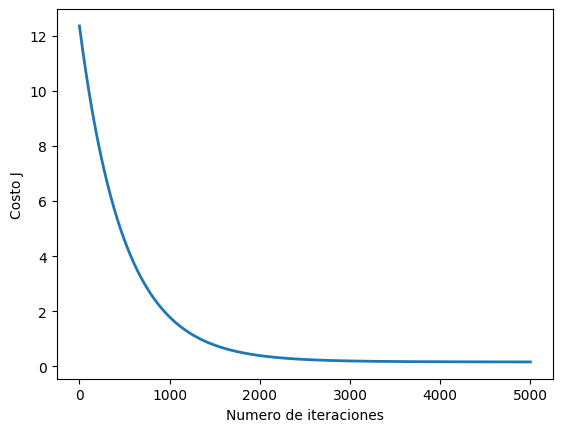

In [234]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(9)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un smart watch con distintas caracteristicas
X_array = [0.,  7., 57., 71., 48.,  5.,  5., 23.,  6.]
X_array[1:9] = (X_array[1:9] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))

In [235]:
X_array = [0.,  7., 57., 71., 48.,  5.,  5., 23.,  6.]
X_array[1:9] = (X_array[1:2] - mu) / sigma

In [236]:
X_array[1:9]

[2.0352928215429267,
 -0.6963106238227914,
 -1.7299668517818778,
 -1.4386306201676395,
 -1.4974242750139868,
 4.6426691539050315,
 5.7907552633252735,
 -1.418322745050251]

In [237]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [238]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));


X_array = [0.,  7., 57., 71., 48.,  5.,  5., 23.,  6.]
price = np.dot(X_array, theta)

print('Precio predecido (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 4.86       -0.1827709  -0.04441551  0.2755752  -0.02781936 -0.02436271
  0.81266659 -0.04068182 -0.02571356]
Precio predecido (usando la ecuación de la normal): $17
